In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#data_dir = "r'/Users/saikarthiknaladala/Downloads/prepared_data/train'"
train_datagen = ImageDataGenerator(validation_split=0.2) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( r'/Users/saikarthiknaladala/Downloads/prepared_data/train',
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( r'/Users/saikarthiknaladala/Downloads/prepared_data/train',
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')  
 


Found 59713 images belonging to 2 classes.
Found 14928 images belonging to 2 classes.


In [4]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [5]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [6]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
1867/1867 [==============================] - 85s 46ms/step - loss: 0.9780 - categorical_accuracy: 0.9000 - precision: 0.9000 - recall: 0.9000 - val_loss: 0.3851 - val_categorical_accuracy: 0.8434 - val_precision: 0.8434 - val_recall: 0.8434
Epoch 2/15
1867/1867 [==============================] - 86s 46ms/step - loss: 0.1157 - categorical_accuracy: 0.9589 - precision: 0.9589 - recall: 0.9589 - val_loss: 0.3342 - val_categorical_accuracy: 0.8849 - val_precision: 0.8849 - val_recall: 0.8849
Epoch 3/15
1867/1867 [==============================] - 87s 46ms/step - loss: 0.0855 - categorical_accuracy: 0.9693 - precision: 0.9693 - recall: 0.9693 - val_loss: 0.2782 - val_categorical_accuracy: 0.8971 - val_precision: 0.8971 - val_recall: 0.8971
Epoch 4/15
1867/1867 [==============================] - 92s 49ms/step - loss: 0.0732 - categorical_accuracy: 0.9751 - precision: 0.9751 - recall: 0.9751 - val_loss: 0.1794 - val_categorical_accuracy: 0.9267 - val_precision: 0.9267 - val_recall:

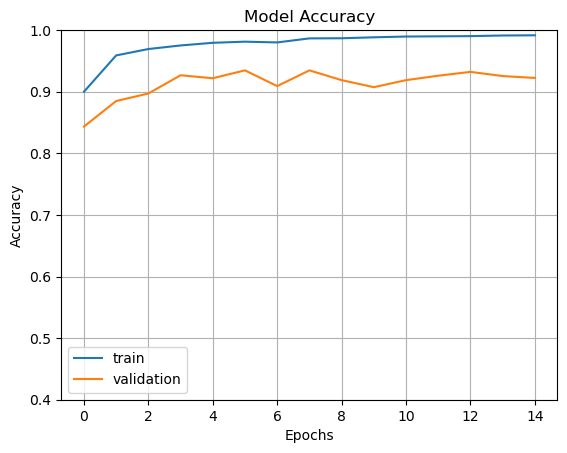

In [7]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [1]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/test/close_eyes/s0037_00001_1_0_0_0_0_01.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

NameError: name 'np' is not defined

In [9]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/test/close_eyes/s0037_00001_1_0_0_0_0_01.png')
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(69, 69, 3)
(69, 69, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 50ms/step


In [10]:
np.argmax(pred)

0

In [11]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/test/close_eyes/s0037_00003_1_0_0_0_0_01.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [12]:
pred=cnn_model.predict(image)

1/1 [==============================] - 0s 8ms/step


In [13]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)
# 0 is close 1 is open

The predicted class is 0


In [14]:
cnn_model.save(r'/Users/saikarthiknaladala/Downloads/models/cnn.h5')

/Users/saikarthiknaladala/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model
test_model = load_model(r'/Users/saikarthiknaladala/Downloads/models/cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 27ms/step
[0]


In [7]:
import os
from tqdm import tqdm
x_test = []
raw_dir = r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037'
for dirpath, dirname, filenames in os.walk(raw_dir):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split("_")[4]=='0':
                x_test.append(0)
        elif i.split("_")[4]=='1':
                x_test.append(1)
print(len(x_test))
print(x_test[0])
print(x_test.count(1))
print(x_test.count(0))
#print(x_test[-1])

100%|████████████████████████████████| 10257/10257 [00:00<00:00, 3263120.16it/s]

10257
0
4237
6020


In [8]:
import os
from tqdm import tqdm
#x_test = []
raw_dir = r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037'
for dirpath, dirname, filenames in os.walk(raw_dir):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        print(i)

100%|█████████████████████████████████| 10257/10257 [00:00<00:00, 674616.61it/s]

s0037_00455_1_0_0_0_0_01.png
s0037_05974_1_1_0_0_0_01.png
s0037_03022_1_0_0_0_0_01.png
s0037_05345_1_1_0_2_0_01.png
s0037_00668_1_0_0_0_0_01.png
s0037_09241_1_1_1_2_0_01.png
s0037_06957_1_0_1_0_0_01.png
s0037_06969_1_0_1_0_0_01.png
s0037_00053_1_0_0_0_0_01.png
s0037_09870_1_1_1_1_0_01.png
s0037_03970_1_1_0_0_0_01.png
s0037_03142_1_1_0_2_0_01.png
s0037_02939_1_0_0_0_1_01.png
s0037_00250_1_0_0_0_0_01.png
s0037_04235_1_1_0_0_0_01.png
s0037_00237_1_0_0_0_1_01.png
s0037_07216_1_0_1_0_0_01.png
s0037_07094_1_0_1_0_1_01.png
s0037_03917_1_1_0_0_1_01.png
s0037_04036_1_1_0_0_0_01.png
s0037_07228_1_0_1_0_0_01.png
s0037_07297_1_0_1_0_1_01.png
s0037_07015_1_0_1_0_0_01.png
s0037_07610_1_0_1_0_0_01.png
s0037_04633_1_1_0_0_0_01.png
s0037_05992_1_1_0_0_0_01.png
s0037_00631_1_0_0_0_1_01.png
s0037_08737_1_1_1_0_0_01.png
s0037_07413_1_0_1_0_0_01.png
s0037_01911_1_0_0_0_0_01.png
s0037_09299_1_1_1_2_0_01.png
s0037_04430_1_1_0_0_0_01.png
s0037_00432_1_0_0_0_1_01.png
s0037_01828_1_0_0_0_0_01.png
s0037_00789_1_

In [9]:
import os
from tqdm import tqdm
import cv2
import numpy as np

img_height, img_width = 32,32

y = []
raw_dir = '/Users/saikarthiknaladala/Downloads/prepared_data/s0037/'
for dirpath, dirname, filenames in os.walk(raw_dir):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        #s = "r'"+raw_dir[0:]+str(i)+"'"
        y.append(i)
print(len(y))

100%|████████████████████████████████| 10257/10257 [00:00<00:00, 5426460.16it/s]

10257


In [10]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

y_test = []
cnn_model = load_model(r'/Users/saikarthiknaladala/Downloads/models/cnn.h5')
raw_dir = r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037/'
for i in y:
    img_height, img_width = 32,32
    print(i)
    
    image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037/'+i)
    #image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/test/close_eyes/s0037_00001_1_0_0_0_0_01.png')
    #print(image.shape)
    r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #print(r_eye.shape)
    r_eye = cv2.resize(r_eye, (img_height,img_width))
    #print(r_eye.shape)
    #r_eye= r_eye/255
    r_eye=  r_eye.reshape((-1, 32, 32, 3))
    #print(r_eye.shape)
    #r_eye = np.expand_dims(r_eye,axis=0)
    pred=cnn_model.predict(r_eye)
    a = np.argmax(pred)
    y_test.append(a)
print(len(y_test))

s0037_00455_1_0_0_0_0_01.png
1/1 [==============================] - 0s 82ms/step
s0037_05974_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03022_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05345_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00668_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09241_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06957_1_0_1_0_0_01.png
1/1 [==============================] - 0s 13ms/step
s0037_06969_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00053_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09870_1_1_1_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03970_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03142_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02939_1_0_0_0_1_01.png
1/1 [==

1/1 [==============================] - 0s 9ms/step
s0037_06457_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05649_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02283_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03275_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06469_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05677_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08586_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02080_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06252_1_0_1_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08101_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02407_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08383_1_0_1_0_0_01.png
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step
s0037_09716_1_1_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_03210_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01492_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_07990_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06631_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04382_1_1_0_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_09515_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01691_1_0_0_0_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_04181_1_1_0_2_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_09728_1_1_1_0_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_06034_1_0_1_1_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06432_1_0_1_0_0_01.png
1/1 [=========================

1/1 [==============================] - 0s 9ms/step
s0037_01974_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08752_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07448_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07571_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05871_1_1_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00550_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04552_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07772_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00753_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04751_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02802_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07177_1_0_1_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_05332_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03730_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09236_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09807_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09433_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07888_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08679_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02341_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05509_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01736_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05734_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03336_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_05535_1_1_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01537_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08912_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07835_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06794_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08446_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03188_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02140_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06516_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06528_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08478_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08645_1_0_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
s0037_09956_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05852_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06948_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09260_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05364_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03003_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05955_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07668_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00271_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02918_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09465_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02999_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_00883_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05720_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08985_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03322_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09624_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02355_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09419_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05318_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02550_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03527_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04688_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09021_1_1_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_07079_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02932_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00066_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03945_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00663_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07642_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05941_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09274_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06962_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03017_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05370_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00764_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_08452_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06502_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02154_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01523_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08906_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08651_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08938_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09699_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06701_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06583_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03320_1_1_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03347_1_1_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_02094_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03261_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05663_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03084_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01606_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09582_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07939_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05486_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06698_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02271_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04116_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05685_1_1_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
s0037_00523_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05802_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03034_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09532_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07185_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07307_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03838_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05408_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03806_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07104_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07386_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02816_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_09000_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04821_1_1_0_1_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06198_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06127_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10083_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05200_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01202_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09935_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08694_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09139_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09107_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01283_1_0_0_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
s0037_04913_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00320_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04322_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03881_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00525_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07739_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04527_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09331_1_1_1_2_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07504_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00718_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05885_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00726_1_0_0_0_1_01.png
1/1 [==============================

1/1 [==============================] - 0s 10ms/step
s0037_09664_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01762_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02128_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05760_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02116_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02394_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01561_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05563_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00842_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03764_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06178_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03559_1_1_0_0_0_01.png
1/1 [==============================

1/1 [==============================] - 0s 8ms/step
s0037_07887_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00819_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05705_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09601_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01380_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03502_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09004_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09808_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05100_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06123_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08073_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10180_1_1_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_00159_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07540_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01842_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04563_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07743_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04760_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07447_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04464_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04062_1_1_0_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00466_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01945_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00458_1_0_0_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_04982_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09727_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03221_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06600_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06482_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00901_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05026_1_1_0_1_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01422_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09719_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06681_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06403_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02032_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_00982_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08884_1_1_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07922_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09599_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02057_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08551_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01225_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06039_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03625_1_1_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10226_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02652_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01018_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_01408_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06614_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06496_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00994_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04996_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09733_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03235_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06695_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05609_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04399_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05434_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05032_1_1_0_1_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_00748_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00776_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04774_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07757_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04549_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01868_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02827_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07152_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02898_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00173_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07351_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08847_1_1_1_2_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_07908_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04127_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02240_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03288_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00917_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01434_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06628_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04119_1_1_0_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06697_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05489_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_07936_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02043_1_0_0_0_0_01.png
1/1 [============================

1/1 [==============================] - 0s 8ms/step
s0037_03175_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00856_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06554_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01748_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02380_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03348_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07810_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08463_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05792_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00831_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02358_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09696_1_1_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_04533_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07713_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05891_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00732_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04730_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09995_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00137_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02863_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04308_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03099_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04336_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07128_1_0_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_02966_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00032_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07092_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03123_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04254_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02980_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07277_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04069_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04865_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05578_1_1_0_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07249_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04057_1_1_0_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
s0037_09129_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04780_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08363_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09925_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08684_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10093_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09196_1_1_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05210_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01212_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09969_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06870_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01851_1_0_0_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_05750_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03352_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09654_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02126_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06570_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03151_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09457_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00872_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01551_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03754_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06375_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09863_1_1_1_2_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
s0037_06192_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02746_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09806_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09133_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03435_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06296_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01208_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08144_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10089_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05234_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01236_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03636_1_1_0_0_0_01.png
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step
s0037_00097_1_0_0_0_1_01.png
1/1 [==============================] - 0s 11ms/step
s0037_00028_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09401_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03107_1_1_0_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04826_1_1_0_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03702_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06912_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05931_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04014_1_1_0_1_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08794_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04493_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_07477_1_0_1_0_0_01.png
1/1 [=============================

1/1 [==============================] - 0s 9ms/step
s0037_06669_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04158_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04166_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00968_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08585_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01676_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07949_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10070_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01073_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02639_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09348_1_1_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08380_1_0_1_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_01613_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03091_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09597_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02059_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06431_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02067_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08561_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07912_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03292_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00933_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05690_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03615_1_1_0_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
s0037_07270_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02987_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03143_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02938_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05975_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07648_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09240_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06956_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03023_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00657_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06968_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00553_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_02016_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08510_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01662_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02028_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02215_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06643_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04172_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08591_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04397_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01438_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07985_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02272_1_0_0_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
s0037_00442_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08779_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07463_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00641_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08747_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07660_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00723_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04721_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09984_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07702_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01803_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00520_1_0_0_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_01781_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09687_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01503_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08926_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03381_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07801_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08472_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02174_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06522_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08277_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04416_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06327_1_0_1_0_1_01.png
1/1 [==============================

1/1 [==============================] - 0s 10ms/step
s0037_00938_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01626_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07919_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08881_1_1_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09747_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02289_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03241_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06009_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03870_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05440_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01442_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06463_1_0_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_00684_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00406_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06985_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00438_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09293_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07624_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05397_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07419_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04607_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00487_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07520_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04503_1_1_0_0_0_01.png
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step
s0037_10246_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01245_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06059_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05247_1_1_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06264_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02632_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08334_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08188_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10045_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06067_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04153_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06662_1_0_1_0_1_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_02869_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09796_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07321_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08837_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00103_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08809_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02857_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07122_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02830_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09770_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03847_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00164_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_09895_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08051_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09099_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02557_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03624_1_1_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10227_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05299_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02653_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06205_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08355_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10024_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02450_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_02033_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06465_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01679_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08535_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04965_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00967_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01444_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04169_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06658_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06666_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02230_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04157_1_1_0_2_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_07478_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08762_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07682_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09235_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06923_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04025_1_1_0_1_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07481_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00622_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01983_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03108_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04829_1_1_0_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00027_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_03201_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09102_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03404_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01286_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05006_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06218_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01004_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05400_1_1_0_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03639_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08175_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06025_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10086_1_1_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
s0037_03662_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05260_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08191_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09159_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02615_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05063_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09167_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03461_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08110_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06012_1_1_0_1_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08392_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02694_1_0_0_0_0_01.png
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step
s0037_07738_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01807_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07505_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09330_1_1_1_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09980_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06818_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00727_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05884_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04725_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00798_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04518_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07706_1_0_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_08500_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07973_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08854_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04950_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00952_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06068_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02481_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08187_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06255_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01049_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08305_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01077_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_04532_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01813_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07712_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09994_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00733_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04731_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04608_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07416_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01914_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05398_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04435_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04033_1_1_0_1_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_09878_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05170_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08185_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09941_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02601_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05049_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03676_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05274_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01276_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01248_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03648_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02680_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_02647_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08341_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09907_1_1_1_2_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10233_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02444_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01033_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02679_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10030_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08246_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03788_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06316_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02740_1_0_0_0_0_01.png
1/1 [==============================] -

s0037_00170_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02824_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06014_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09782_1_1_1_2_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_07335_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00129_1_0_0_0_1_01.png
1/1 [==============================] - 0s 12ms/step
s0037_08823_1_1_1_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04927_1_1_0_2_0_01.png
1/1 [==============================] - 0s 13ms/step
s0037_00314_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04316_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04194_1_1_0_0_1_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04328_1_1_0_0_0_01.png
1/1 [==============================] - 0s 14ms/step
s0037_07136_1_0_1_0_0_01.png


1/1 [==============================] - 0s 8ms/step
s0037_09732_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03234_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00995_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04997_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06416_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01488_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_00914_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04398_1_1_0_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_09531_1_1_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04971_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00973_1_0_0_0_1_01.png
1/1 [==============================] - 0s 11ms/step
s0037_01450_1_0_0_0_0_01.png
1/1 [===========================

1/1 [==============================] - 0s 10ms/step
s0037_02992_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02814_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07161_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04341_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00343_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02895_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07362_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06844_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04779_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07567_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05867_1_1_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04544_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_03707_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10186_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05305_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01339_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08075_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06125_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03739_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05106_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01104_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04823_1_1_0_1_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09002_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01386_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_09662_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03364_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01559_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06745_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08497_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03159_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08292_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02794_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09067_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03561_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05163_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01161_1_0_0_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
s0037_09388_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04521_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01800_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01867_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09961_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00544_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00779_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06878_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01859_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03455_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06018_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00142_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_02588_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03540_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06161_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06384_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09892_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01198_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06106_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03598_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08056_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10124_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02753_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08255_1_0_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_02535_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08033_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01142_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02708_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10141_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07878_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01747_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00859_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02330_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06360_1_0_1_1_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08636_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08961_1_1_1_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_05926_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05918_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00439_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06984_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04484_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00486_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00604_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08765_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01943_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04064_1_1_0_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00460_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04462_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_03554_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09657_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03351_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05753_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06770_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09454_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06573_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02125_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09669_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04015_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07036_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09481_1_1_1_2_0_01.png
1/1 [==============================]

s0037_09402_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03908_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00216_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00112_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03831_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09931_1_1_1_1_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05401_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09505_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00311_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00796_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05835_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01837_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05039_1_1_0_2_0_01.png
1/1 

1/1 [==============================] - 0s 9ms/step
s0037_05133_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01131_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09805_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09009_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05330_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02578_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09234_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03732_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09431_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00814_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01588_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05708_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_04957_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08507_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02001_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07974_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01675_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08539_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04969_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01448_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04165_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02202_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06654_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07193_1_0_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_00235_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04237_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07295_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00089_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02962_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07017_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03915_1_1_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04034_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05990_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00633_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04631_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08735_1_1_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_08584_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06656_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05448_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06250_1_0_1_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03277_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09771_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05675_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01072_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05070_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03472_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09174_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02405_1_0_0_0_1_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_00353_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07171_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02804_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00989_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03228_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01415_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01697_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00936_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04384_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00908_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07996_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03216_1_1_0_0_0_01.png
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step
s0037_02086_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08580_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05671_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03273_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02285_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06451_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06005_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08501_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03070_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09576_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01470_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05472_1_1_0_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
s0037_01549_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06755_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09672_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03374_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06568_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05776_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06556_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05748_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02382_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05575_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01577_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00854_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_08820_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09781_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07336_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07308_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07135_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05604_1_1_0_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02840_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03888_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00210_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02979_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00092_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07231_1_0_1_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_08199_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09151_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03469_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02623_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06275_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03654_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01254_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08118_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01233_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_10230_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08342_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02644_1_0_0_0_0_01.png
1/1 [==============================] 

s0037_01268_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02422_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10255_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09350_1_1_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_10068_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08327_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06277_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08522_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02024_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06472_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07951_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02219_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08876_1_1_1_0_0_01.png
1/1 [===

1/1 [==============================] - 0s 11ms/step
s0037_03443_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09145_1_1_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_08132_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03640_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02688_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01240_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05242_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02637_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06464_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03278_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01445_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05447_1_1_0_0_0_01.png
1/1 [==============================

1/1 [==============================] - 0s 13ms/step
s0037_00587_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04707_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_07519_1_0_1_0_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_00705_1_0_0_0_1_01.png
1/1 [==============================] - 0s 12ms/step
s0037_00538_1_0_0_0_1_01.png
1/1 [==============================] - 0s 12ms/step
s0037_06885_1_0_1_0_0_01.png
1/1 [==============================] - 0s 14ms/step
s0037_07724_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04504_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00506_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04786_1_1_0_0_1_01.png
1/1 [==============================] - 0s 11ms/step
s0037_05898_1_1_0_0_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_04739_1_1_0_0_0_01.png
1/1 [========================

1/1 [==============================] - 0s 9ms/step
s0037_05646_1_1_0_1_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08169_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09323_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06204_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03418_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03426_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09120_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01026_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05024_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06285_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01099_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02451_1_0_0_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step
s0037_02591_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08097_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02713_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08215_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10164_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04677_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06146_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08016_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02197_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02315_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06345_1_0_1_1_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06540_1_0_1_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_03032_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02849_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04895_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07287_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00024_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03135_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08798_1_1_1_1_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03939_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03986_1_1_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05588_1_1_0_2_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07681_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01980_1_0_0_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_03766_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06144_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03758_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08296_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02790_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05167_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06379_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01165_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09063_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03565_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01102_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03780_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_00186_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04184_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07325_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05414_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05211_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09315_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06803_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00501_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09924_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05820_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04781_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00580_1_0_0_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
s0037_06686_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03218_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06404_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09523_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01425_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07998_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06639_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02251_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06607_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06485_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01699_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04985_1_1_0_0_0_01.png
1/1 [===========================

1/1 [==============================] - 0s 10ms/step
s0037_03872_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03243_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09745_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06461_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05442_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02088_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03645_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08109_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03478_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01078_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01046_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09546_1_1_1_1_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
s0037_07083_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07201_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04021_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01938_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00699_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04419_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07607_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08720_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05985_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04624_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07404_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00618_1_0_0_0_1_01.png
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step
s0037_07803_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06520_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02176_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08470_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01783_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00822_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05781_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01501_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03383_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08924_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09685_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03586_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_08846_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08878_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06641_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02217_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04170_1_1_0_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02095_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01660_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01759_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_08415_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02391_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07866_1_0_1_0_0_01.png
1/1 [==============================] - 0s 13ms/step
s0037_08941_1_1_1_0_0_01.png
1/1 [===========================

1/1 [==============================] - 0s 13ms/step
s0037_02815_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_04340_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_00342_1_0_0_0_1_01.png
1/1 [==============================] - 0s 13ms/step
s0037_07363_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02105_1_0_0_0_1_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06553_1_0_1_0_0_01.png
1/1 [==============================] - 0s 13ms/step
s0037_09649_1_1_1_0_0_01.png
1/1 [==============================] - 0s 13ms/step
s0037_03172_1_1_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_08482_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02184_1_0_0_0_0_01.png
1/1 [==============================] - 0s 12ms/step
s0037_06750_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02306_1_0_0_0_1_01.png
1/1 [=======================

s0037_03670_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02607_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09947_1_1_1_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_02280_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03248_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06454_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08504_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06000_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03075_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09573_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01475_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05477_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05449_1_1_0_0_0_01.png
1/1 [

1/1 [==============================] - 0s 9ms/step
s0037_07192_1_0_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_00132_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03811_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07391_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02866_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07113_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00236_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03124_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08789_1_1_1_1_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_03916_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00035_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04884_1_1_0_2_0_01.png
1/1 [===========================

1/1 [==============================] - 0s 10ms/step
s0037_01272_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01097_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10094_1_1_1_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_03428_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02662_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08683_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_06234_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08364_1_0_1_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01016_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05014_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03416_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01294_1_0_0_0_0_01.png
1/1 [===========================

1/1 [==============================] - 0s 10ms/step
s0037_02520_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04647_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08026_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08623_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_07853_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08420_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_10154_1_1_1_1_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02199_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08974_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02940_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03988_1_1_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05586_1_1_0_2_1_01.png
1/1 [==============================

1/1 [==============================] - 0s 9ms/step
s0037_04611_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00491_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04229_1_1_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09480_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04217_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07009_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07234_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00111_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00393_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07130_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04310_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00312_1_0_0_0_1_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_06174_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02522_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09053_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03555_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05157_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01155_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01132_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02778_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10131_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02545_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08043_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09209_1_1_1_0_1_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step
s0037_09434_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07830_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09609_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02145_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06513_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09800_1_1_1_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05108_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01388_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06194_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03737_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03709_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06397_1_0_1_0_1_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 10ms/step
s0037_09069_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09865_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06373_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03752_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02742_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06314_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08244_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06196_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_10135_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01136_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09883_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_08047_1_0_1_0_0_01.png
1/1 [==============================]

1/1 [==============================] - 0s 10ms/step
s0037_03956_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00075_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05566_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09462_1_1_1_2_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_00276_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05952_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00473_1_0_0_0_0_01.png
1/1 [==============================] - 0s 11ms/step
s0037_06971_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09267_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_05363_1_1_0_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_00670_1_0_0_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_09259_1_1_1_2_0_01.png
1/1 [==========================

1/1 [==============================] - 0s 9ms/step
s0037_01497_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01428_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02262_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04105_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06031_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04700_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05290_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04937_1_1_0_1_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_10013_1_1_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03692_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02664_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09197_1_1_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_01670_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08583_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08868_1_1_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02207_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06651_1_0_1_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04160_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02239_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08856_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_06269_1_0_1_1_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00950_1_0_0_0_1_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04952_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02004_1_0_0_0_0_01.png
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step
s0037_00488_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07694_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05916_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00437_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_05928_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07497_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_01995_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00634_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08755_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00653_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00450_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01973_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_08492_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02194_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00841_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03162_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09659_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02115_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03266_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_09760_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05664_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00978_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02093_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08595_1_0_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_05356_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06944_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09252_1_1_1_2_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_02995_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02914_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_03963_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00040_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09469_1_1_1_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07103_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07381_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00122_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03801_1_1_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 8ms/step
s0037_10183_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02548_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05505_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05738_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04095_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_09602_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01586_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_03304_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05706_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08675_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07884_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06725_1_0_1_0_0_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_08537_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02031_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08509_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01645_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01478_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02232_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06664_1_0_1_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04155_1_1_0_2_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04959_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01541_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_08964_1_1_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_05543_1_1_0_0_1_01.png
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
s0037_07543_1_0_1_0_0_01.png
1/1 [==============================] - 0s 10ms/step
s0037_04763_1_1_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_00761_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07740_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00359_1_0_0_0_1_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07145_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07378_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07346_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_04365_1_1_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00367_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_07224_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00087_1_0_0_0_0_01.png
1/1 [==============================] - 

1/1 [==============================] - 0s 9ms/step
s0037_02257_1_0_0_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_04130_1_1_0_2_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_02269_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_01423_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00900_1_0_0_0_1_01.png
1/1 [==============================] - 0s 8ms/step
s0037_08552_1_0_1_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02054_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_07921_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_06680_1_0_1_0_0_01.png
1/1 [==============================] - 0s 8ms/step
s0037_01727_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_00886_1_0_0_0_0_01.png
1/1 [==============================] - 0s 9ms/step
s0037_02350_1_0_0_0_0_01.png
1/1 [==============================] - 0

In [11]:
print(x_test[0:50])
print(y_test[0:50])

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [12]:
c = 0
for i in range(len(x_test)):
    if x_test[i]==y_test[i]:
        c+=1
print(c)

9303


In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(x_test,y_test)
print(cm)

[[5602  418]
 [ 536 3701]]


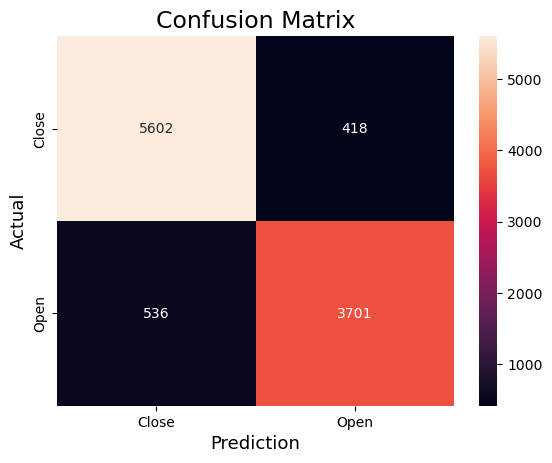

Accuracy   : 0.9069903480549868
Precision : 0.8985190580237922
Recall    : 0.8734953976870428
F1-score  : 0.8858305409286741


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Close', 'Open'],
            yticklabels=['Close', 'Open'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(x_test, y_test)
print("Accuracy   :", accuracy)
precision = precision_score(x_test, y_test)
print("Precision :", precision)
recall = recall_score(x_test, y_test)
print("Recall    :", recall)
F1_score = f1_score(x_test, y_test)
print("F1-score  :", F1_score)

In [16]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

In [17]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [18]:
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23850242 (90.98 MB)
Trainable params: 262530 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [19]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
1867/1867 [==============================] - 145s 77ms/step - loss: 0.1142 - categorical_accuracy: 0.9585 - precision_1: 0.9585 - recall_1: 0.9585 - val_loss: 0.2856 - val_categorical_accuracy: 0.9147 - val_precision_1: 0.9147 - val_recall_1: 0.9147
Epoch 2/15
1867/1867 [==============================] - 135s 72ms/step - loss: 0.0682 - categorical_accuracy: 0.9746 - precision_1: 0.9746 - recall_1: 0.9746 - val_loss: 0.3838 - val_categorical_accuracy: 0.8932 - val_precision_1: 0.8932 - val_recall_1: 0.8932
Epoch 3/15
1867/1867 [==============================] - 135s 72ms/step - loss: 0.0552 - categorical_accuracy: 0.9798 - precision_1: 0.9798 - recall_1: 0.9798 - val_loss: 0.3523 - val_categorical_accuracy: 0.9049 - val_precision_1: 0.9049 - val_recall_1: 0.9049
Epoch 4/15
1867/1867 [==============================] - 147s 79ms/step - loss: 0.0456 - categorical_accuracy: 0.9827 - precision_1: 0.9827 - recall_1: 0.9827 - val_loss: 0.5109 - val_categorical_accuracy: 0.8820 - val

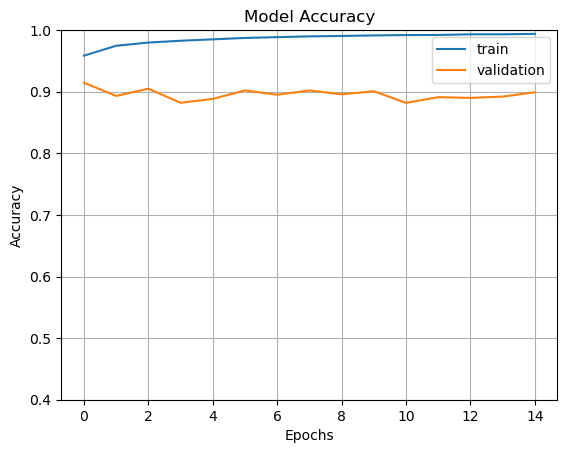

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
resnet50_model.save(r'/Users/saikarthiknaladala/Downloads/models/resnet50.h5')

In [22]:
resnet50_model_regularized = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [23]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5))
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [24]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
1867/1867 [==============================] - 113s 60ms/step - loss: 0.1493 - categorical_accuracy: 0.9434 - precision_2: 0.9434 - recall_2: 0.9434 - val_loss: 0.2527 - val_categorical_accuracy: 0.9174 - val_precision_2: 0.9174 - val_recall_2: 0.9174
Epoch 2/15
1867/1867 [==============================] - 109s 58ms/step - loss: 0.1006 - categorical_accuracy: 0.9619 - precision_2: 0.9619 - recall_2: 0.9619 - val_loss: 0.2876 - val_categorical_accuracy: 0.8971 - val_precision_2: 0.8971 - val_recall_2: 0.8971
Epoch 3/15
1867/1867 [==============================] - 112s 60ms/step - loss: 0.0871 - categorical_accuracy: 0.9663 - precision_2: 0.9663 - recall_2: 0.9663 - val_loss: 0.2594 - val_categorical_accuracy: 0.9019 - val_precision_2: 0.9019 - val_recall_2: 0.9019
Epoch 4/15
1867/1867 [==============================] - 125s 67ms/step - loss: 0.0797 - categorical_accuracy: 0.9710 - precision_2: 0.9710 - recall_2: 0.9710 - val_loss: 0.3298 - val_categorical_accuracy: 0.9181 - val

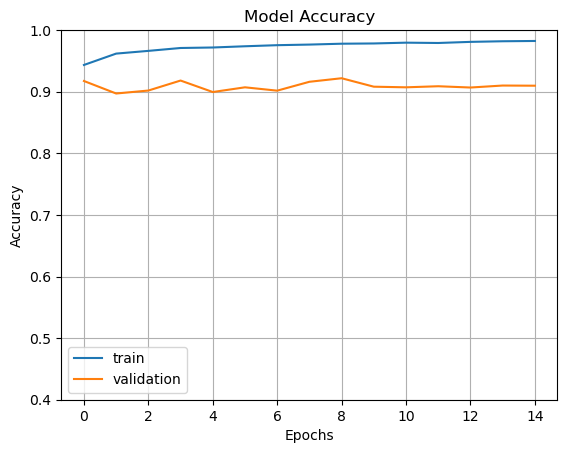

In [25]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [26]:
resnet50_model_regularized.save(r'/Users/saikarthiknaladala/Downloads/models/resnet50_modelregularized.h5')

In [27]:
resnet50_fine_tune = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet50_fine_tune.add(pretrained_model)

In [28]:
resnet50_fine_tune.add(Flatten())
resnet50_fine_tune.add(Dense(128, activation='relu'))
resnet50_fine_tune.add(Dropout(0.5))
resnet50_fine_tune.add(Dense(2, activation='softmax'))

In [29]:
resnet50_fine_tune.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_fine_tune.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
1867/1867 [==============================] - 628s 336ms/step - loss: 0.1554 - categorical_accuracy: 0.9520 - precision_3: 0.9520 - recall_3: 0.9520 - val_loss: 0.1862 - val_categorical_accuracy: 0.9141 - val_precision_3: 0.9141 - val_recall_3: 0.9141
Epoch 2/15
1867/1867 [==============================] - 645s 346ms/step - loss: 0.1434 - categorical_accuracy: 0.9509 - precision_3: 0.9509 - recall_3: 0.9509 - val_loss: 1.9454 - val_categorical_accuracy: 0.6695 - val_precision_3: 0.6695 - val_recall_3: 0.6695
Epoch 3/15
1867/1867 [==============================] - 672s 360ms/step - loss: 0.1155 - categorical_accuracy: 0.9545 - precision_3: 0.9545 - recall_3: 0.9545 - val_loss: 0.2086 - val_categorical_accuracy: 0.9210 - val_precision_3: 0.9210 - val_recall_3: 0.9210
Epoch 4/15
1867/1867 [==============================] - 727s 390ms/step - loss: 0.0563 - categorical_accuracy: 0.9802 - precision_3: 0.9802 - recall_3: 0.9802 - val_loss: 0.2279 - val_categorical_accuracy: 0.9023 -

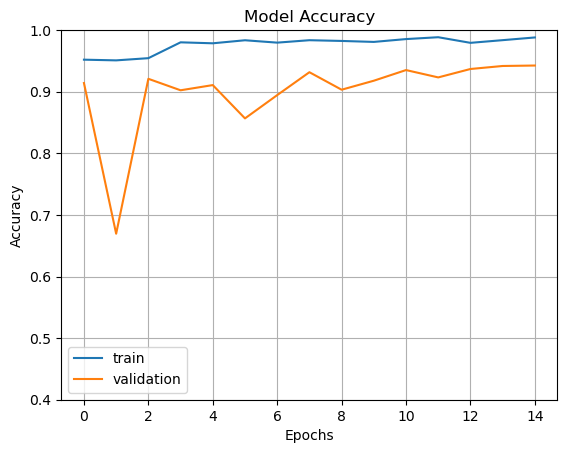

In [30]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [31]:
resnet50_fine_tune.save(r'/Users/saikarthiknaladala/Downloads/models/resnet50_fine_tune.h5')

In [15]:
import os
from tqdm import tqdm
x_test2 = []
raw_dir = r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037'
for dirpath, dirname, filenames in os.walk(raw_dir):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split("_")[4]=='0':
                x_test2.append(0)
        elif i.split("_")[4]=='1':
                x_test2.append(1)
print(len(x_test2))
print(x_test2[0])
#print(x_test[-1])

100%|████████████████████████████████| 10257/10257 [00:00<00:00, 2316318.10it/s]

10257
0


In [16]:
print(x_test.count(1))
print(x_test.count(0))

4237
6020


In [17]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

y_test2 = []
resnet50_fine_tuning_model = load_model(r'/Users/saikarthiknaladala/Downloads/models/resnet50_fine_tune.h5')
raw_dir = r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037/'
for i in y:
    img_height, img_width = 32,32
    print(i)
    
    image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/s0037/'+i)
    #image=cv2.imread(r'/Users/saikarthiknaladala/Downloads/prepared_data/test/close_eyes/s0037_00001_1_0_0_0_0_01.png')
    #print(image.shape)
    r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #print(r_eye.shape)
    r_eye = cv2.resize(r_eye, (img_height,img_width))
    #print(r_eye.shape)
    #r_eye= r_eye/255
    r_eye=  r_eye.reshape((-1, 32, 32, 3))
    #print(r_eye.shape)
    #r_eye = np.expand_dims(r_eye,axis=0)
    pred=resnet50_fine_tuning_model.predict(r_eye)
    a = np.argmax(pred)
    y_test2.append(a)
print(len(y_test2))

s0037_00455_1_0_0_0_0_01.png
1/1 [==============================] - 0s 310ms/step
s0037_05974_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03022_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05345_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00668_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09241_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06957_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06969_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00053_1_0_0_0_0_01.png
1/1 [==============================] - 0s 20ms/step
s0037_09870_1_1_1_1_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03970_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03142_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02939_1_0_0_0_1_01.pn

1/1 [==============================] - 0s 16ms/step
s0037_06457_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05649_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02283_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03275_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06469_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05677_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08586_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02080_1_0_0_0_0_01.png
1/1 [==============================] - 0s 20ms/step
s0037_06252_1_0_1_1_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08101_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02407_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08383_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_04053_1_1_0_1_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01974_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08752_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07448_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07571_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05871_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00550_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04552_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07772_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00753_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04751_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02802_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_06571_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02198_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09456_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05535_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01537_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08912_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07835_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06794_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08446_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03188_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02140_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06516_1_0_1_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_04800_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09427_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00802_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07823_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01722_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00883_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05720_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08985_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03322_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09624_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02355_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09419_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_03799_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08257_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02751_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06307_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01399_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_10118_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06780_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08452_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06502_1_0_1_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02154_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01523_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08906_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_05960_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07663_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00642_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07583_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05030_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09309_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05233_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06821_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07780_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00523_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05802_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03034_1_1_0_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09967_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01861_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06020_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03859_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03867_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00144_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08829_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00123_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09788_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07301_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08817_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04913_1_1_0_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_04842_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08412_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07861_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04096_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03339_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00898_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06525_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02173_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01786_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00827_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05506_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06718_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09025_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09910_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03698_1_1_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05018_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06206_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01298_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09321_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03627_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10098_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02453_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09122_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03424_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01057_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10054_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08325_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01069_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_10257_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09352_1_1_1_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05256_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06048_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08874_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04970_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02026_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08520_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_06015_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00372_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06875_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05856_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00577_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09952_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05868_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02646_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08340_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01231_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_10232_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08143_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_02287_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06007_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08503_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06453_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09940_1_1_1_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05048_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06256_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05275_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03677_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03649_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08387_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02681_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_07972_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02007_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04951_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00953_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01417_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00934_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01695_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04989_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09712_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03214_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01496_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04386_1_1_0_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 18ms/step
s0037_08422_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06515_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02143_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07889_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06728_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00817_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09432_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01788_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05508_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06716_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03337_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08990_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01095_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10096_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08165_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02463_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03629_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05016_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06208_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08358_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01014_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09112_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03414_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09717_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_03576_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09070_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02580_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03548_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06354_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09842_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08204_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03775_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01375_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06169_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07611_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08736_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09308_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03886_1_1_0_1_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07781_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01801_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05803_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07485_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06919_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00626_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01987_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04498_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07686_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06927_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09766_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03260_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09163_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03465_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05067_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08396_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03658_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02690_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01258_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08114_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05264_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03666_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_01940_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05942_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04558_1_1_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_07746_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00767_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04765_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07545_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00759_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05845_1_1_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00564_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04566_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07778_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09447_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00862_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06560_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03342_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09644_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01742_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02108_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05740_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02335_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06763_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08633_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08654_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_04584_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00586_1_0_0_0_1_01.png
1/1 [==============================] - 0s 18ms/step
s0037_05818_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07599_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05826_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00507_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09922_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06805_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09313_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05217_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04483_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00603_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_10167_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06378_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01164_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08228_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_10238_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02471_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06027_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01284_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05286_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10005_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03684_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02672_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 18ms/step
s0037_05115_1_1_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_03517_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04830_1_1_0_1_1_01.png
1/1 [==============================] - 0s 18ms/step
s0037_09011_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03111_1_1_0_1_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03529_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09823_1_1_1_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01129_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03714_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05316_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06108_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10195_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_06337_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08462_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06532_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02164_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07811_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09697_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01513_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03391_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08936_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05793_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05395_1_1_0_1_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01791_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_03553_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09055_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02524_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06172_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03750_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02798_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06371_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09867_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00497_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07409_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04617_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00615_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_03333_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08994_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09635_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07832_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06511_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02147_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09436_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01335_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08079_1_0_1_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06129_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01108_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09802_1_1_1_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01407_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09186_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02448_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03480_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_10201_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05082_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01080_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08373_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02675_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06223_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_10002_1_1_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09385_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_00064_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02930_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07640_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00661_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09248_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06960_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09276_1_1_1_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03015_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05372_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05943_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00405_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07619_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_06687_1_0_1_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03219_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01424_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07999_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06638_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05426_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06484_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01698_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06606_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03227_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09721_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04188_1_1_0_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_06873_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05888_1_1_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_04729_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07537_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04796_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04514_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00516_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00528_1_0_0_0_1_01.png
1/1 [==============================] - 0s 18ms/step
s0037_06895_1_0_1_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_07734_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04717_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07509_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_04681_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09824_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05112_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01110_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09016_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01392_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03510_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07895_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08664_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06734_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09613_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05717_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01514_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04039_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09690_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05794_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00837_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00888_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08465_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01729_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06330_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02766_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04401_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08260_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 18ms/step
s0037_08338_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01671_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02206_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04161_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00951_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04953_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02238_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01472_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07970_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02005_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07849_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01776_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_09247_1_1_1_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05343_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_03024_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07472_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05972_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00453_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00256_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03948_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03144_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00055_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00268_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_09778_1_1_1_2_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_08618_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01554_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04047_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02320_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06370_1_0_1_1_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08626_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01757_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07868_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01152_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05556_1_1_0_1_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02718_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02525_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_06183_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06301_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02757_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08251_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08709_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01320_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06102_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08052_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09896_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02769_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06585_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06707_1_0_1_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01527_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09421_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00804_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04806_1_1_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09224_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03722_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05320_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02568_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09019_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09815_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05123_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01121_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_00598_1_0_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_09333_1_1_1_2_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07506_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04718_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04525_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00527_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_07705_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04799_1_1_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01885_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04726_1_1_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_05887_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_00724_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_04266_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04258_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04065_1_1_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04869_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08764_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00662_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07643_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04463_1_1_0_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_05940_1_1_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01942_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07440_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06963_1_0_1_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_00985_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_06438_1_0_1_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01624_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08568_1_0_1_0_0_01.png
1/1 [==============================] - 0s 18ms/step
s0037_08883_1_1_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01419_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04134_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02253_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04938_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05699_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00162_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03841_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 18ms/step
s0037_03785_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01107_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08713_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06126_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06141_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02517_1_0_0_0_1_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08293_1_0_1_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_02795_1_0_0_0_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_05162_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09066_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03560_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09058_1_1_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 14ms/step
s0037_02582_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08206_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09840_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05148_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02767_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04400_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08261_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03592_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09094_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01192_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09898_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05190_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_03971_1_1_0_1_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00454_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07475_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00669_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08751_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07676_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04468_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01949_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07073_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04456_1_1_0_1_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04862_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00251_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_04016_1_1_0_1_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_06910_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03700_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04491_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00493_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01968_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04449_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08770_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03002_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07454_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04477_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01956_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_08911_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01534_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08678_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05536_1_1_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04815_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00829_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06594_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02340_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04027_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03388_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08646_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07808_1_0_1_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_06793_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08441_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04811_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00813_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08915_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01530_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05532_1_1_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05689_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06497_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01409_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04124_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02243_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_03674_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09372_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08138_1_0_1_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01274_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05276_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_03449_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02603_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_09943_1_1_1_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05075_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03477_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_09171_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05248_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 15ms/step
s0037_07049_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04269_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04858_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08865_1_1_1_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07373_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04350_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_00352_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02805_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_07170_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00151_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07548_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04756_1_1_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_03033_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_05431_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00321_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05805_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00719_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04599_1_1_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07787_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06826_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03608_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_01886_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07584_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_01839_1_0_0_0_1_01.png
1/1 [=======================

1/1 [==============================] - 0s 17ms/step
s0037_05543_1_1_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02189_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02136_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08430_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_07843_1_0_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04052_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_04657_1_1_0_2_0_01.png
1/1 [==============================] - 0s 17ms/step
s0037_08036_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_08089_1_0_1_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_10144_1_1_1_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_04454_1_1_0_2_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_02733_1_0_0_0_0_01.png
1/1 [=======================

1/1 [==============================] - 0s 16ms/step
s0037_01727_1_0_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00886_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_02350_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_04037_1_1_0_2_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_03398_1_1_0_0_0_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00839_1_0_0_0_1_01.png
1/1 [==============================] - 0s 15ms/step
s0037_06584_1_0_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01798_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_00807_1_0_0_0_1_01.png
1/1 [==============================] - 0s 16ms/step
s0037_08901_1_1_1_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_01524_1_0_0_0_0_01.png
1/1 [==============================] - 0s 15ms/step
s0037_05526_1_1_0_0_1_01.png
1/1 [=======================

In [18]:
print(x_test2[0:50])
print(y_test2[0:50])

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [32]:
c = 0
for i in range(len(x_test2)):
    if x_test2[i]==y_test2[i]:
        c+=1
print(c)


9297


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(x_test2,y_test2)
print(cm)

[[5604  416]
 [ 544 3693]]


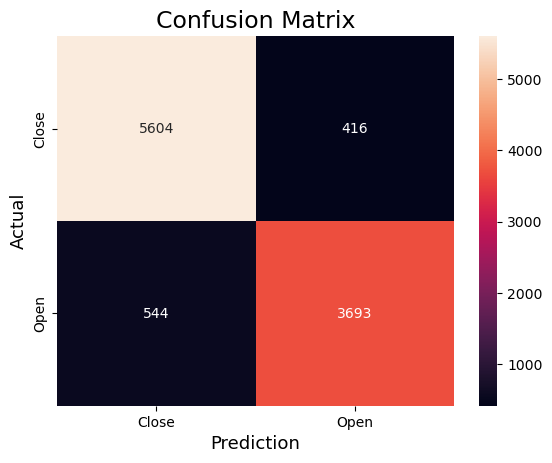

Accuracy   : 0.9064053816905528
Precision : 0.898758822097834
Recall    : 0.871607269294312
F1-score  : 0.8849748382458662


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Close', 'Open'],
            yticklabels=['Close', 'Open'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(x_test2,y_test2)
print("Accuracy   :", accuracy)
precision = precision_score(x_test2,y_test2)
print("Precision :", precision)
recall = recall_score(x_test2,y_test2)
print("Recall    :", recall)
F1_score = f1_score(x_test2,y_test2)
print("F1-score  :", F1_score)